In [1]:
# date：日期，可能是指房产的上市日期、成交日期或者其他相关日期。
# price：价格，指的是房产的销售价格或者市场估价。
# bedrooms：卧室数量，表示该房产拥有的卧室个数。
# bathrooms：浴室数量，表示该房产拥有的浴室个数。
# sqft_living：居住面积，指的是房产的居住空间大小，通常以平方英尺（square feet）为单位。
# sqft_lot：占地面积，表示该房产所占据的土地面积，也通常以平方英尺为单位。
# floors：楼层数，表示该房产的建筑层数。
# waterfront：是否靠水，这是一个布尔值（是或否），表示该房产是否位于水边，如湖边、海边等。
# view：景观，描述该房产的主要景观或视野，如山景、海景等。
# condition：状况，表示房产的维护状况或者物理状况，如新旧程度、是否需要维修等。
# sqft_above：地上面积，指的是地面以上的建筑面积，不包括地下室。
# sqft_basement：地下室面积，表示地下部分的建筑面积。
# yr_built：建造年份，表示该房产最初建造的年份。
# yr_renovated：翻新年份，表示该房产最近一次大规模翻新或改造的年份。
# street：街道名称，表示该房产所在的街道。
# city：城市，表示该房产所在的城市。
# statezip：州和邮编，表示该房产所在的州以及邮政编码。
# country：国家，表示该房产所在的国家。

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# 导包、确定输入文件

/kaggle/input/housedata/output.csv
/kaggle/input/housedata/data.csv
/kaggle/input/housedata/data.dat


In [2]:
df=pd.read_csv("/kaggle/input/housedata/output.csv")
#  随机替换 city 列的值
import random
cities = ['nangang', 'daoli', 'daowai', 'xiangfang', 'pingfang', 'songbei', "a'cheng", 'hulan']
df['city'] = df['city'].apply(lambda x: random.choice(cities))

# 根据 city 的值替换 statezip 列的值
city_statezip_mapping = {
    'nangang': '150000',
    'daoli': '150000',
    'daowai': '150000',
    'xiangfang': '150000',
    'pingfang': '150000',
    'songbei': '150000',
    "a'cheng": '150300',
    'hulan': '150500'
}
df['statezip'] = df['city'].map(city_statezip_mapping)

# 替换 country 列的值为 'China'
df['country'] = 'China'

df.head()
# 输出头部字段

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,nangang,150000,China
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,hulan,150500,China
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,songbei,150000,China
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,nangang,150000,China
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,pingfang,150000,China


In [3]:
df.shape
# 数据条目，4600行，18列

(4600, 18)

In [4]:
df.isnull().sum().sum()
# 查看 DataFrame 中的空值数量

0

In [5]:
df.info()
# 查看 DataFrame 中每个特征的数据类型和缺失值情况。

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
df.describe()
# 查看 DataFrame 中数值型特征的统计信息。

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.103478,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.159990,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [7]:
df.select_dtypes("object").nunique()
# 查看 DataFrame 中非数值型特征的唯一值数量。

date          70
street      4525
city           8
statezip       3
country        1
dtype: int64

In [8]:
df.drop(columns=['statezip','country',"date","street"],inplace=True)
# 删除不需要的列。

In [9]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,nangang
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,hulan
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,songbei
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,nangang
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,pingfang


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

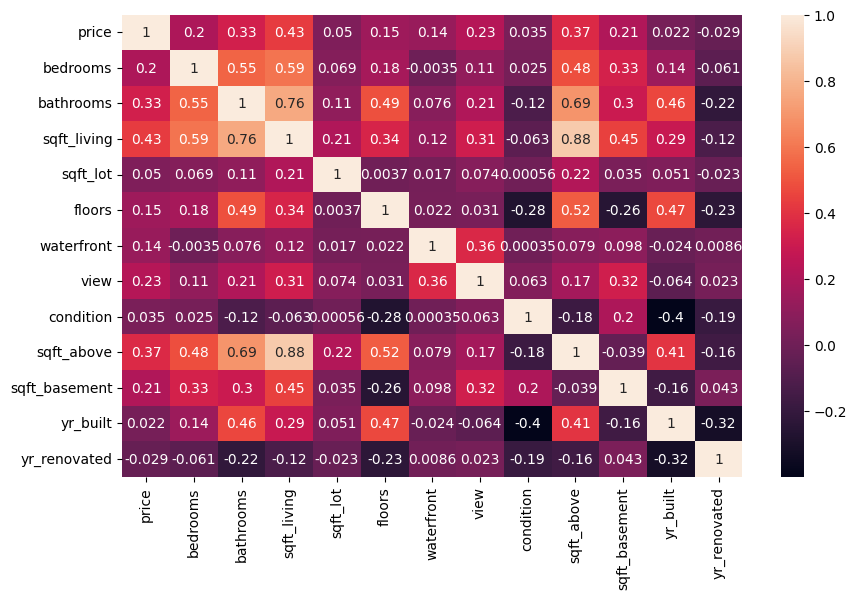

In [11]:
x=df.select_dtypes("number")
plt.figure(figsize=(10,6))
sns.heatmap(x.corr(),annot=True);
# 使用 Seaborn 绘制数值型特征之间的相关性热力图。

In [12]:
correlation_matrix = df.select_dtypes("number").drop(columns=['price']).corr()
high_corr = correlation_matrix[(correlation_matrix > 0.6) & (correlation_matrix !=1.0)]
high_corr = high_corr.stack().reset_index()
high_corr.columns = ['Variable 1', 'Variable 2', 'Correlation']
high_corr = high_corr.dropna()
high_corr 
# 查看特征之间的高相关性。

,Variable 1,Variable 2,Correlation
0,bathrooms,sqft_living,0.760952
1,bathrooms,sqft_above,0.689918
2,sqft_living,bathrooms,0.760952
3,sqft_living,sqft_above,0.876592
4,sqft_above,bathrooms,0.689918
5,sqft_above,sqft_living,0.876592


In [13]:
df[["sqft_above","sqft_living","bathrooms","price"]].corr()
# 查看特定特征与目标变量之间的相关性。

,sqft_above,sqft_living,bathrooms,price
sqft_above,1.000000,0.876592,0.689918,0.367570
sqft_living,0.876592,1.000000,0.760952,0.430322
bathrooms,0.689918,0.760952,1.000000,0.327110
price,0.367570,0.430322,0.327110,1.000000


In [14]:
df.drop(columns=["sqft_above","bathrooms"],inplace=True)
# 根据分析结果删除多重共线性的特征。删除浴室和地上面积连个特征，因为它们的相关性最弱

In [15]:
df.head()
# 确认清洗后的数据

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1340,7912,1.5,0,0,3,0,1955,2005,nangang
1,2384000.0,5.0,3650,9050,2.0,0,4,5,280,1921,0,hulan
2,342000.0,3.0,1930,11947,1.0,0,0,4,0,1966,0,songbei
3,420000.0,3.0,2000,8030,1.0,0,0,4,1000,1963,0,nangang
4,550000.0,4.0,1940,10500,1.0,0,0,4,800,1976,1992,pingfang


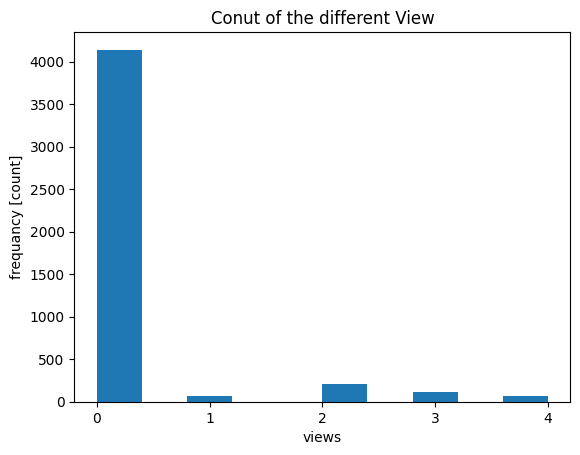

In [16]:
df['view'].value_counts()
df['view'].plot(kind="hist")
plt.xticks([0,1,2,3,4])
plt.xlabel("views")
plt.ylabel("frequancy [count]")
plt.title("Conut of the different View");
# 绘制直方图，统计景观类别总数，大部分是处于view等级为0的住宅

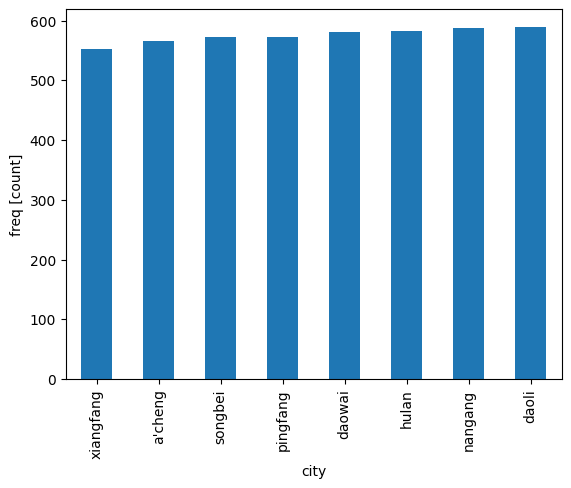

In [17]:
df['city'].value_counts().sort_values().tail(10).plot(kind="bar")
plt.xlabel("city")
plt.ylabel("freq [count]");
# 绘制直方图，统计不同区域总数，大部分来自松北

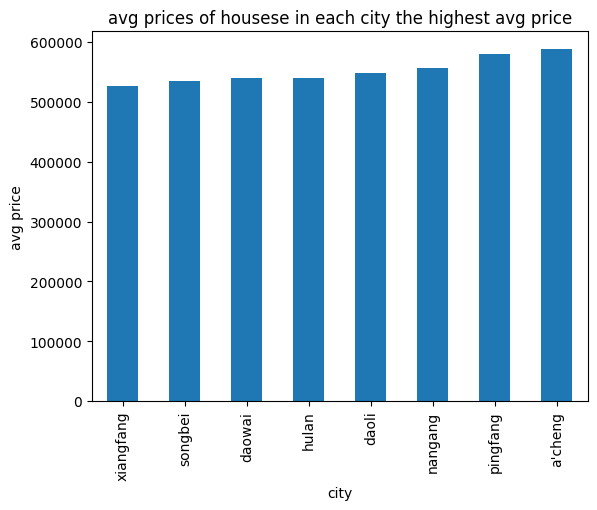

In [18]:
df.groupby('city')['price'].mean().sort_values().tail(10).plot(kind="bar")
plt.xlabel("city")
plt.ylabel("avg price")
plt.title("avg prices of housese in each city the highest avg price");
# 绘制直方图，统计最低平均价格最低的区域房产均价Top10

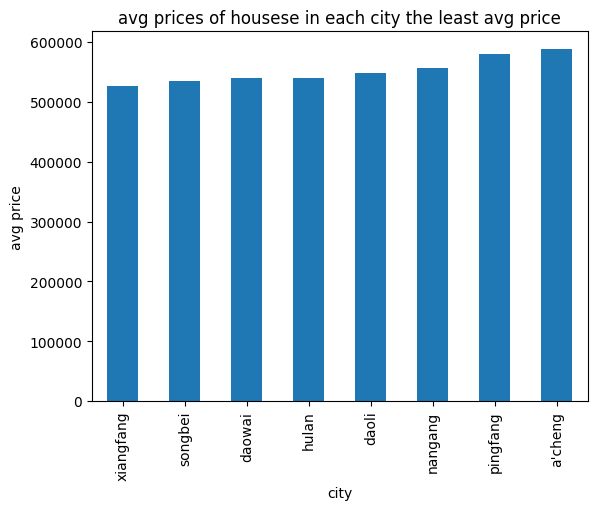

In [19]:
df.groupby('city')['price'].mean().sort_values().head(10).plot(kind="bar")
plt.xlabel("city")
plt.ylabel("avg price")
plt.title("avg prices of housese in each city the least avg price");
# 绘制直方图，统计最低平均价格最高的区域房产均价Top10

In [20]:
df.drop(columns=['floors',"waterfront",'condition'],inplace=True)
df.head()
# 价格范围过大，再次删除相关性较弱特征项

,price,bedrooms,sqft_living,sqft_lot,view,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1340,7912,0,0,1955,2005,nangang
1,2384000.0,5.0,3650,9050,4,280,1921,0,hulan
2,342000.0,3.0,1930,11947,0,0,1966,0,songbei
3,420000.0,3.0,2000,8030,0,1000,1963,0,nangang
4,550000.0,4.0,1940,10500,0,800,1976,1992,pingfang


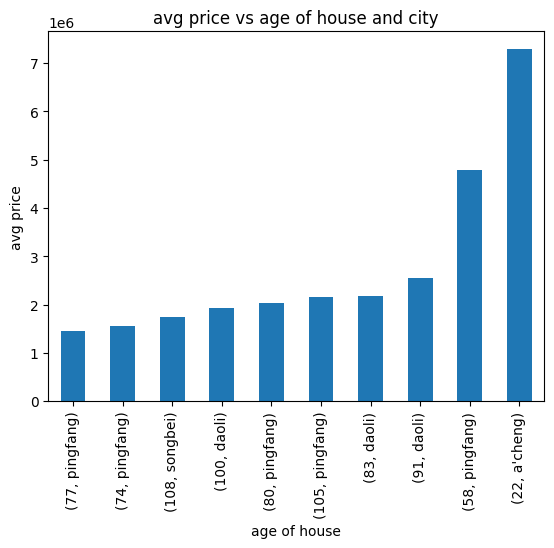

In [21]:
df['n_years']=2014-df['yr_built']#表示房屋建造年份与2014年的差值，即房龄。
df.groupby(['n_years','city'])['price'].mean().sort_values().tail(10).plot(kind="bar")
plt.xlabel("age of house")
plt.ylabel("avg price")
plt.title("avg price vs age of house and city");
# 绘制直方图，展示不同房龄和城市组合下的房屋平均价格最高的情况。

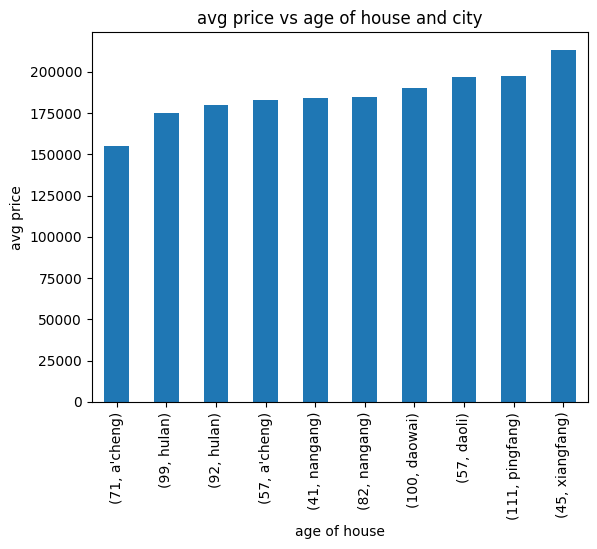

In [22]:
df['n_years']=2014-df['yr_built']
df.groupby(['n_years','city'])['price'].mean().sort_values().head(10).plot(kind="bar")
plt.xlabel("age of house")
plt.ylabel("avg price")
plt.title("avg price vs age of house and city");
# 绘制直方图，展示不同房龄和城市组合下的房屋平均价格最低的情况。

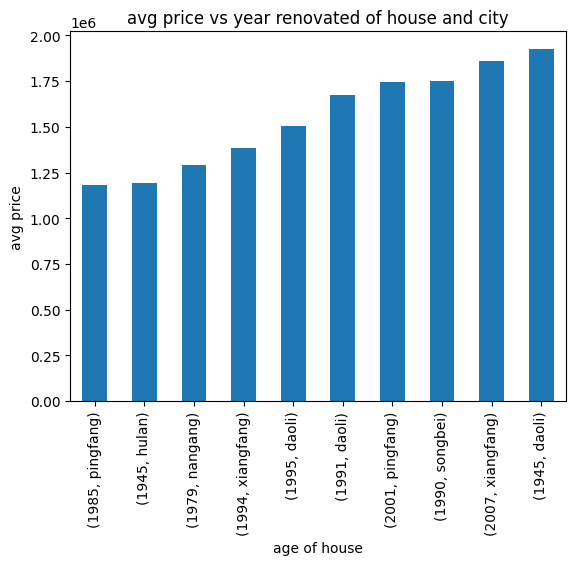

In [23]:
df.groupby(['yr_renovated','city'])['price'].mean().sort_values().tail(10).plot(kind="bar")
plt.xlabel("age of house")
plt.ylabel("avg price")
plt.title("avg price vs year renovated of house and city");
# 绘制直方图，根据房屋翻新年份和城市进行分组，并计算每个分组中房屋价格的平均值，选取平均价格最高Top10

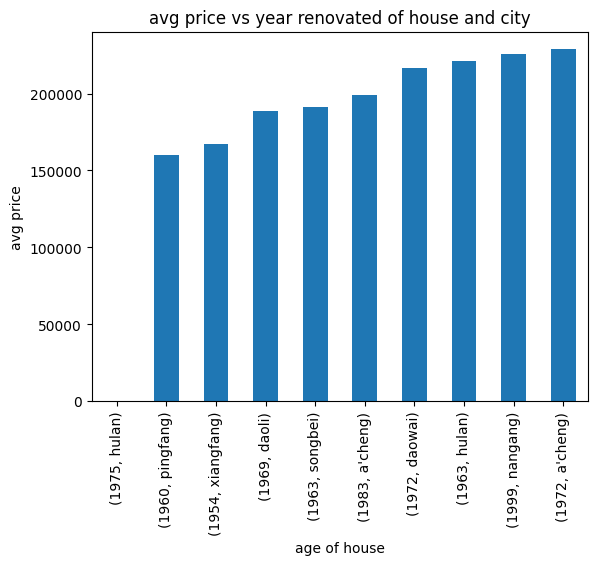

In [24]:
df.groupby(['yr_renovated','city'])['price'].mean().sort_values().head(10).plot(kind="bar")
plt.xlabel("age of house")
plt.ylabel("avg price")
plt.title("avg price vs year renovated of house and city");
# 绘制直方图，根据房屋翻新年份和城市进行分组，并计算每个分组中房屋价格的平均值，选取平均价格最低的Top10

In [25]:
df.drop(columns=["view"],inplace=True)



In [26]:
df.head()

,price,bedrooms,sqft_living,sqft_lot,sqft_basement,yr_built,yr_renovated,city,n_years
0,313000.0,3.0,1340,7912,0,1955,2005,nangang,59
1,2384000.0,5.0,3650,9050,280,1921,0,hulan,93
2,342000.0,3.0,1930,11947,0,1966,0,songbei,48
3,420000.0,3.0,2000,8030,1000,1963,0,nangang,51
4,550000.0,4.0,1940,10500,800,1976,1992,pingfang,38


In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['city'] = label_encoder.fit_transform(df['city'])
# LabelEncoder 对 city 列进行了编码处理。LabelEncoder 将每个不同的城市名称映射到一个整数
# 拟合（Fit）: 首先，fit_transform 方法会根据提供的 city 列中的不同城市名称建立一个编码器，并将每个城市名称映射到一个整数编码。这一步骤将学习到每个城市名称与整数编码之间的映射关系。
# 转换（Transform）: 然后，该方法会对 city 列进行转换操作，将每个城市名称替换为对应的整数编码。



In [28]:
df.info()
# 查看当前的数据框字段信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   sqft_living    4600 non-null   int64  
 3   sqft_lot       4600 non-null   int64  
 4   sqft_basement  4600 non-null   int64  
 5   yr_built       4600 non-null   int64  
 6   yr_renovated   4600 non-null   int64  
 7   city           4600 non-null   int64  
 8   n_years        4600 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 323.6 KB


In [29]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# 导包

In [30]:
X=df.drop(columns=['price'])
y=df['price']
# X 是特征矩阵，包含了除了目标变量 price 以外的所有特征列。
# y 是目标变量，即房屋价格。

In [31]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# train_test_split 函数将数据集 X 和 y 划分为训练集 (X_train, y_train) 和测试集 (X_test, y_test)。
# test_size=0.2 表示将数据集中的 20% 作为测试集，剩余的 80% 作为训练集。
# random_state=42 是一个随机种子，确保每次运行代码时都能得到相同的随机划分结果。

In [32]:
print("train:",X_train.shape)
print("test:",X_test.shape)
print("train:",y_train.shape)
print("test:",y_test.shape)
# 输出各数据集的大小

train: (3680, 8)
test: (920, 8)
train: (3680,)
test: (920,)


In [33]:
pipeline = make_pipeline(StandardScaler(),LinearRegression())
pipeline.fit(X_train, y_train)
# Pipeline 用于将多个转换器和估计器组合成一个序列，这样可以按顺序应用它们，并将输出传递给下一个步骤。在这个管道中，首先应用了 StandardScaler() 对数据进行标准化处理，然后使用 LinearRegression() 进行线性回归建模。
# StandardScaler() 用于对数据进行标准化处理，将每个特征缩放到均值为 0，标准差为 1 的标准正态分布。这有助于确保不同特征的值处于相同的量级，有利于模型的收敛和性能。
# LinearRegression() 是一个线性回归模型，用于拟合数据并预测目标变量 y。它通过学习特征与目标变量之间的线性关系来进行预测。
# pipeline.fit(X_train, y_train) 使用训练集 X_train 和 y_train 对整个管道进行训练，其中包括标准化处理和线性回归建模。

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

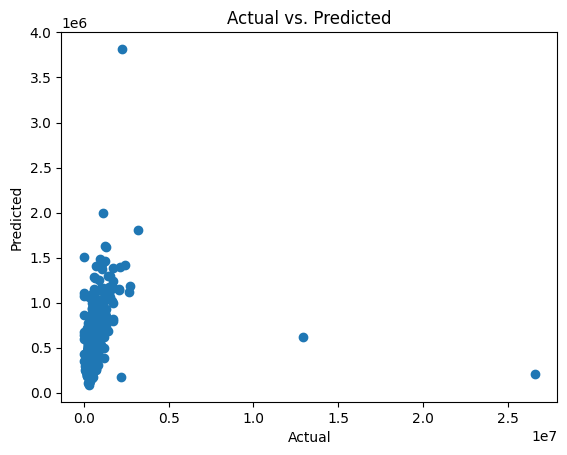

In [34]:
y_pred = pipeline.predict(X_test)

# 这段代码用于对测试集进行预测，并且展示了实际值与预测值之间的关系
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")
plt.show()
# y_pred = pipeline.predict(X_test)：使用训练好的管道模型对测试集 X_test 进行预测，得到预测的目标变量值 y_pred。

# plt.scatter(y_test, y_pred)：使用 matplotlib 绘制散点图，其中横轴表示实际目标变量值 y_test，纵轴表示预测目标变量值 y_pred。这样可以直观地比较模型预测值与实际值之间的关系。

# plt.xlabel("Actual") 和 plt.ylabel("Predicted")：设置横轴和纵轴的标签。

# plt.title("Actual vs. Predicted")：设置图表的标题。

# plt.show()：显示绘制的图表。


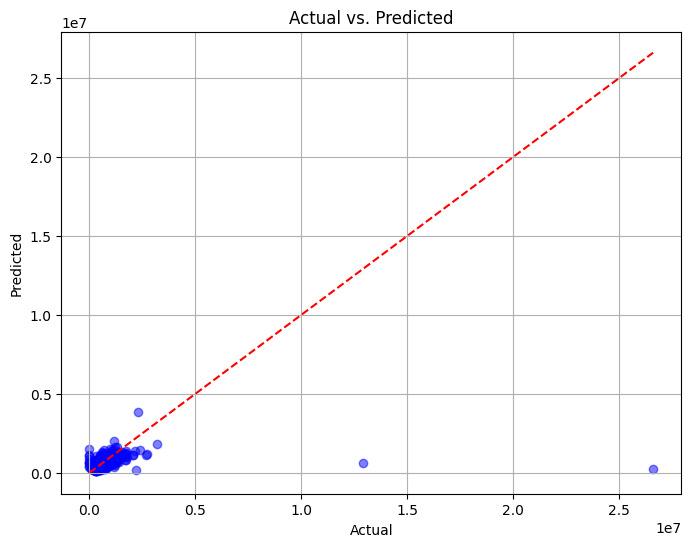

In [35]:
import matplotlib.pyplot as plt
# 绘制了实际值与预测值之间的散点图，并在同一图上绘制了一条对角线，以帮助观察预测值与实际值之间的关系
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.grid(True)
plt.show()


In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 算实际目标变量值 y_test 和预测目标变量值 y_pred 之间的均方误差（MSE），即预测误差的平方的均值。
mse = mean_squared_error(y_test, y_pred)

# 计算实际目标变量值 y_test 和预测目标变量值 y_pred 之间的平均绝对误差（MAE），即预测误差的绝对值的均值。
mae = mean_absolute_error(y_test, y_pred)

# 计算实际目标变量值 y_test 和预测目标变量值 y_pred 之间的 R-squared 值（R平方值），表示模型对目标变量方差的解释程度。
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 989472857681.1537
Mean Absolute Error: 216813.13679655144
R-squared: 0.029782410557272043


Mean Squared Error (MSE)：均方误差是预测值与真实值之间差异的平方的平均值。在这种情况下，均方误差为 989302553373.5791，这意味着模型的预测值与真实值之间的平均差异的平方为该值。由于均方误差是预测误差的平方的平均值，因此它受到异常值的影响，较大的 MSE 值表示模型的拟合程度较差。

Mean Absolute Error (MAE)：平均绝对误差是预测值与真实值之间差异的绝对值的平均值。在这种情况下，平均绝对误差为 214635.8827，这表示模型的预测值与真实值之间的平均绝对差异为该值。与 MSE 不同，MAE 不受异常值的影响，因此更容易理解。

R-squared (R平方)：R-squared 值是一个统计指标，表示模型对因变量方差的解释程度。在这种情况下，R平方值为 0.0299，这表示模型只能解释因变量方差的约 2.99%。换句话说，模型对目标变量的变异性解释不足，表明模型的拟合程度较差。

# IF YOU LIKE PLZ UPVOTE!!